In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min 
from mpl_toolkits.mplot3d import Axes3D 
plt.rcParams['figure.figsize'] = (16, 9) 
plt.style.use('ggplot')

In [2]:
dataframe = pd.read_csv("analisis.csv")
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [3]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [4]:
dataframe.groupby('categoria').size()

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64

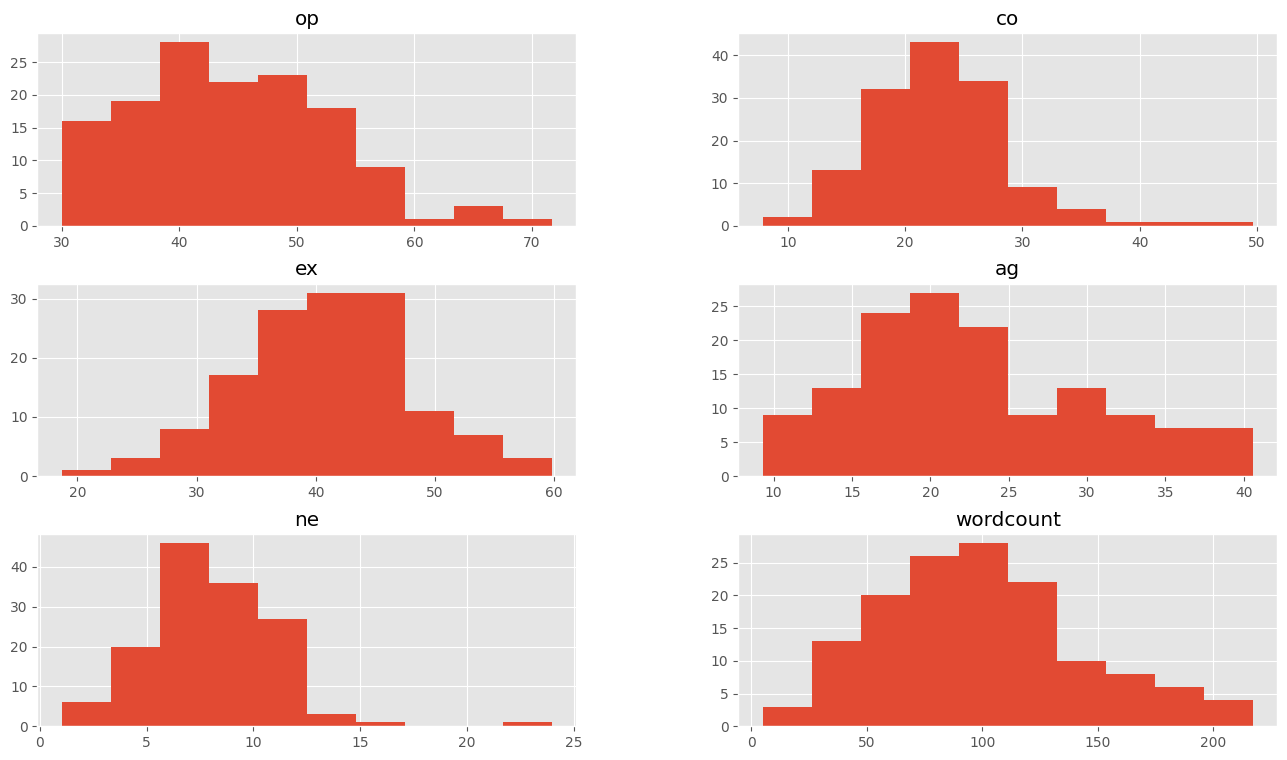

In [7]:
dataframe.drop(['categoria'], axis=1).hist()
plt.show()

/Users/haydeml/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


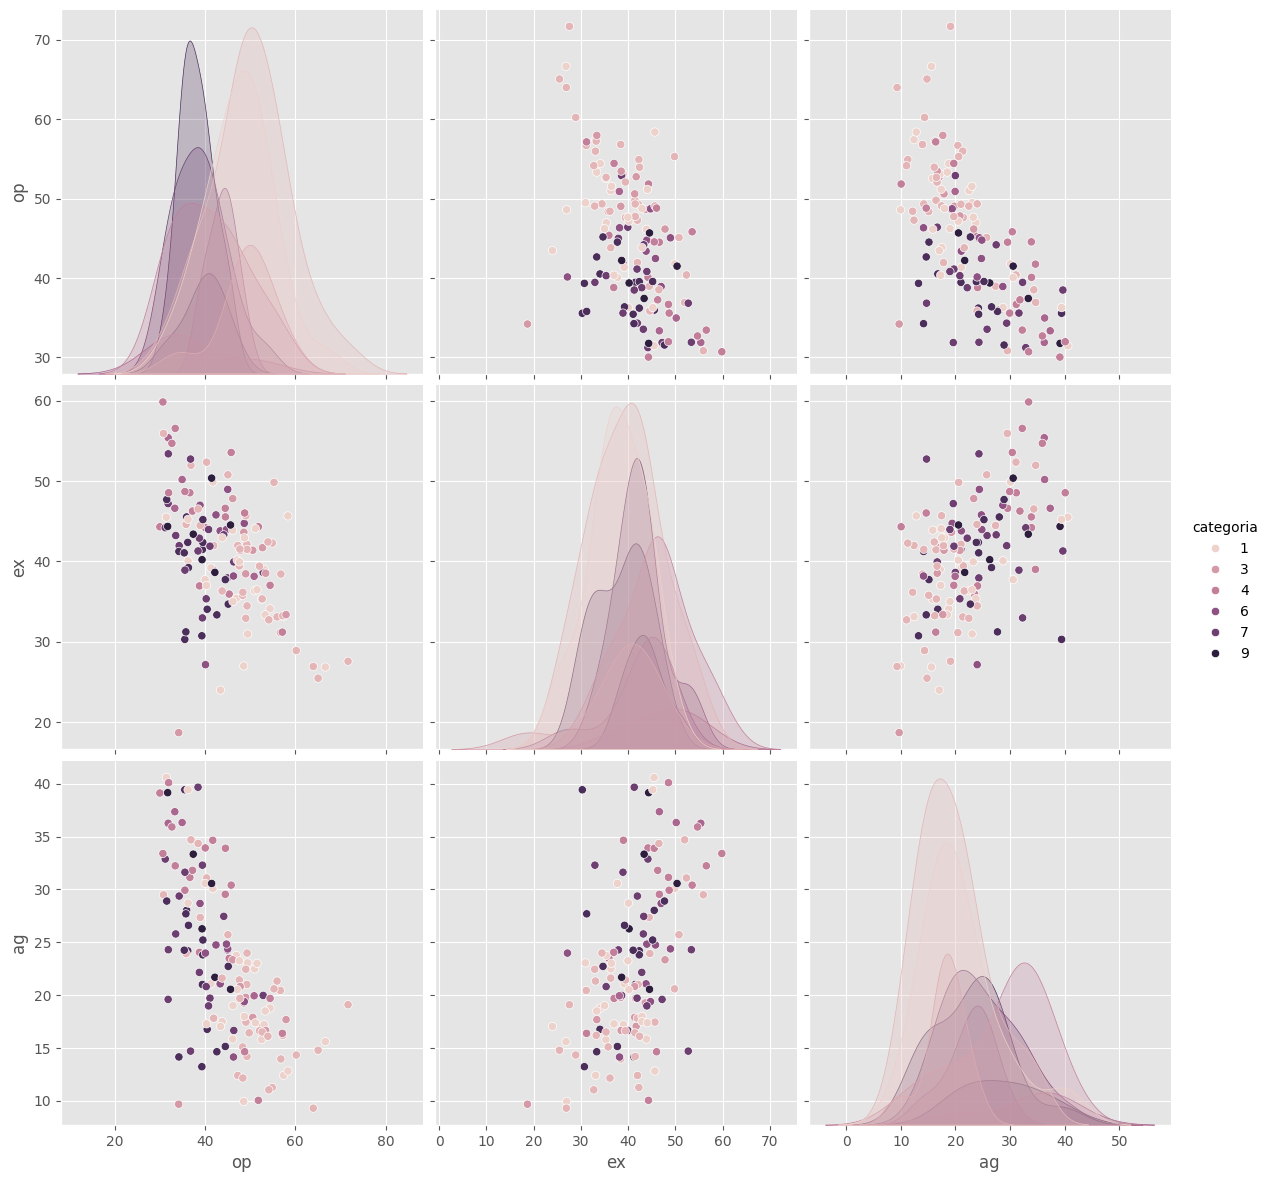

In [8]:
sb.pairplot(dataframe.dropna(), hue='categoria',size=4,vars=["op","ex","ag"],kind='scatter')

In [9]:
X = np.array(dataframe[["op","ex","ag"]]) 
y = np.array(dataframe['categoria']) 
X.shape

(140, 3)

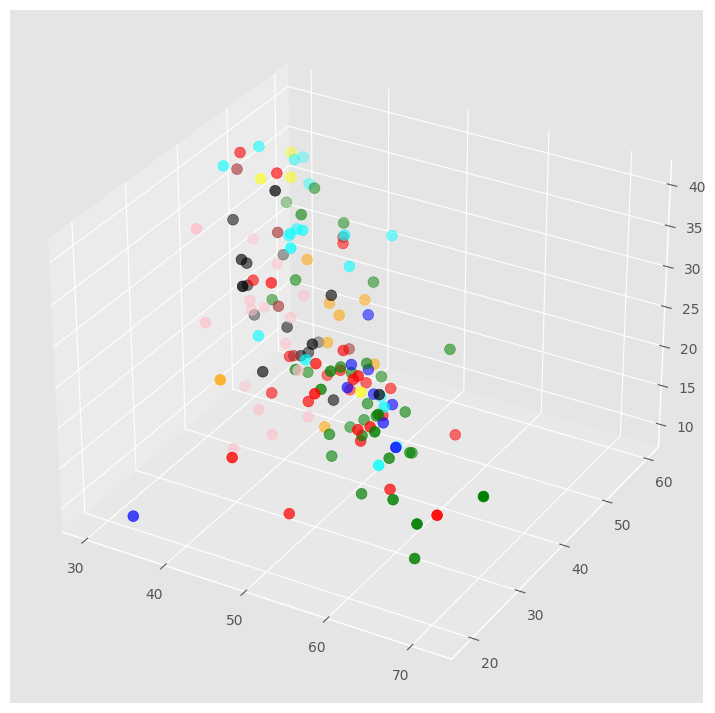

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Configuración correcta del gráfico 3D
colores = ['blue', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange', 
           'black', 'pink', 'brown', 'purple']
asignar = []
for row in y:
    asignar.append(colores[row % len(colores)])  # Evitar errores de índice

# Graficar los puntos
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)

# Mostrar la gráfica
plt.show()

In [12]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans

[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9),
 KMeans(n_clusters=10),
 KMeans(n_clusters=11),
 KMeans(n_clusters=12),
 KMeans(n_clusters=13),
 KMeans(n_clusters=14),
 KMeans(n_clusters=15),
 KMeans(n_clusters=16),
 KMeans(n_clusters=17),
 KMeans(n_clusters=18),
 KMeans(n_clusters=19)]

In [13]:
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score

[-25194.03935276632,
 -12640.468860675679,
 -10047.167149698784,
 -8343.956647749563,
 -7642.876952632356,
 -6138.034528101082,
 -5598.890743206062,
 -4991.014076835767,
 -4561.8554674242405,
 -4206.48176446423,
 -3797.754766683657,
 -3404.765991303253,
 -3333.45685840123,
 -3019.70411693302,
 -2868.8168812267395,
 -2924.6584441006275,
 -2557.8340190698473,
 -2530.0673414089206,
 -2360.5835259554988]

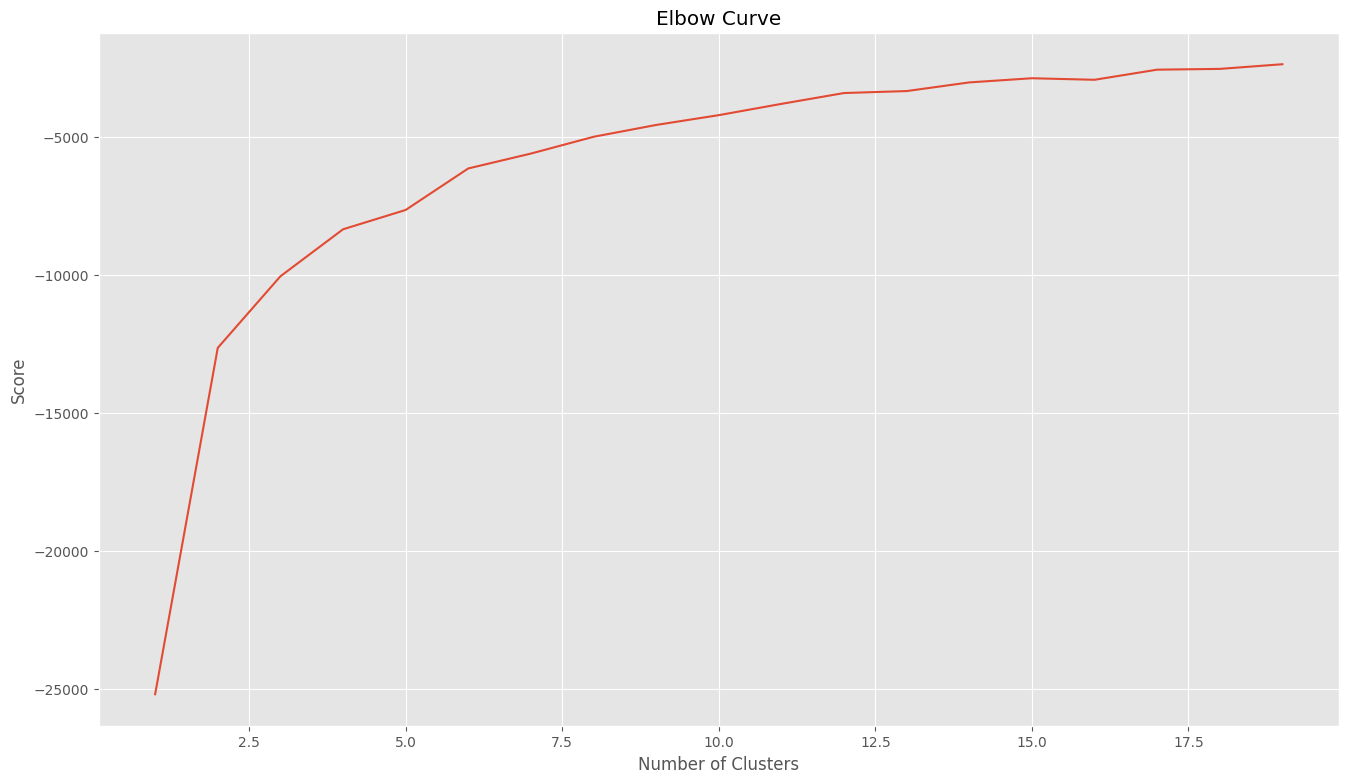

In [14]:
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [15]:
kmeans = KMeans(n_clusters=5).fit(X) 
centroids = kmeans.cluster_centers_ 
print(centroids)

[[52.12532123 37.03013112 16.87503897]
 [40.15406756 34.81619956 23.0424434 ]
 [36.16998167 47.81382164 32.92275875]
 [44.10026512 44.07043318 20.56428232]
 [65.5299666  27.1434742  14.6252708 ]]


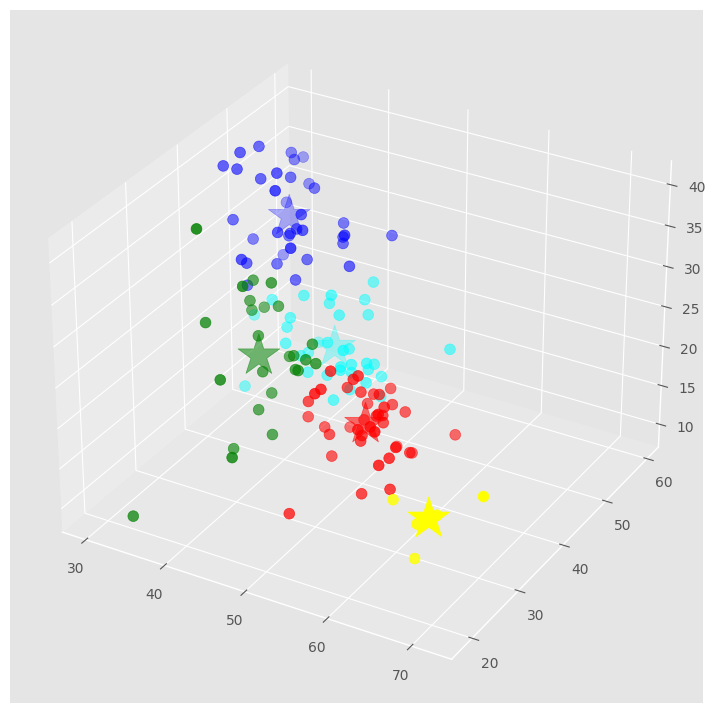

In [16]:
# Asignar colores a los clusters
labels = kmeans.predict(X)
C = kmeans.cluster_centers_  # Centros de los clusters
colores = ['red', 'green', 'blue', 'cyan', 'yellow'] 
asignar = [colores[row % len(colores)] for row in labels]  # Asegurar que no excedan los índices

# Crear la figura y el gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Configuración recomendada

# Graficar los puntos
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)

# Graficar los centroides
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores[:len(C)], s=1000)

# Mostrar la gráfica
plt.show()

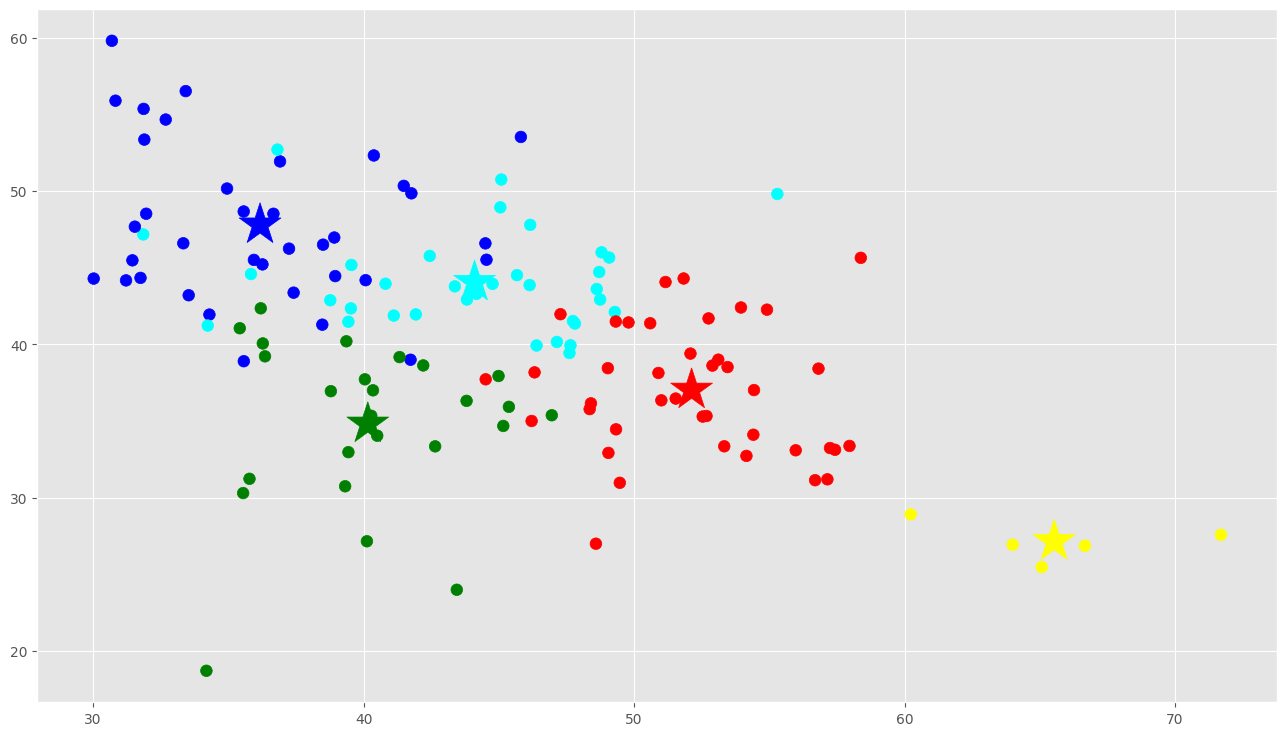

In [17]:
f1 = dataframe['op'].values
f2 = dataframe['ex'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000) 
plt.show()

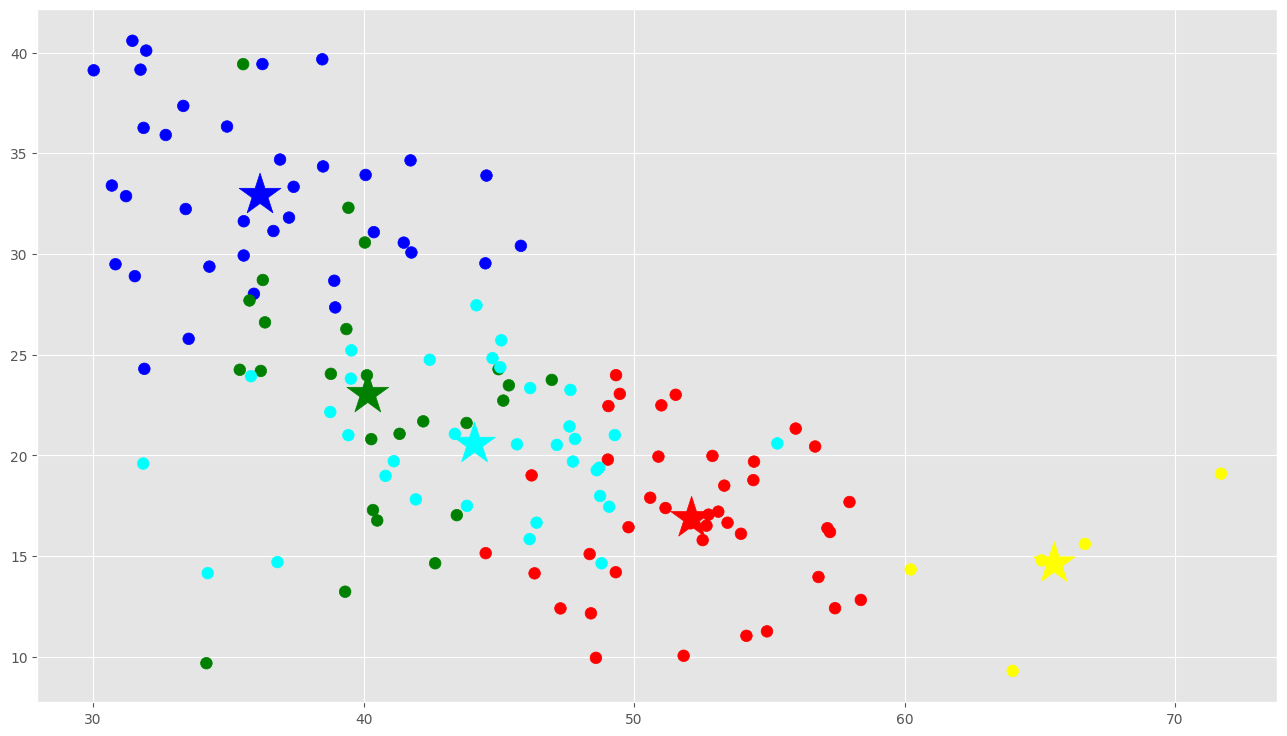

In [18]:
f1 = dataframe['op'].values
f2 = dataframe['ag'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000) 
plt.show()

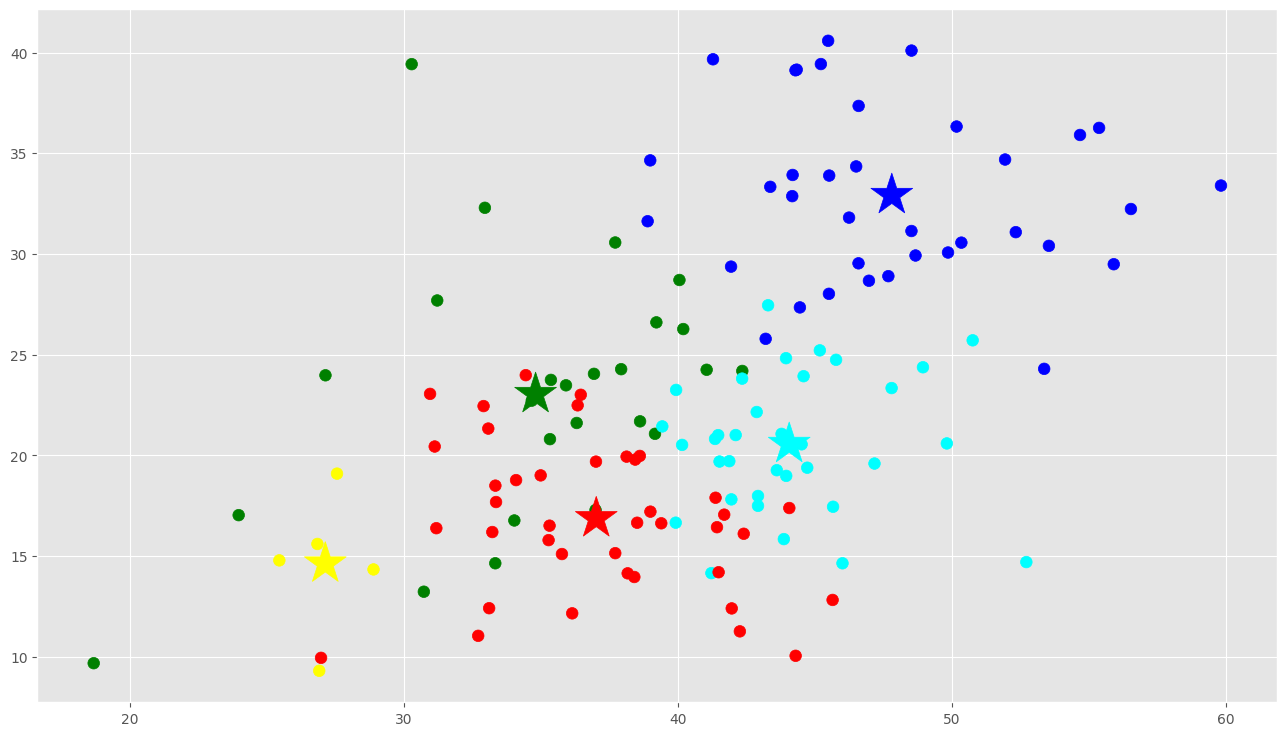

In [19]:
f1 = dataframe['ex'].values 
f2 = dataframe['ag'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000) 
plt.show()

In [21]:
copy = pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
copy.head()

,usuario,categoria,label
0,3gerardpique,7,2
1,aguerosergiokun,7,1
2,albertochicote,4,2
3,AlejandroSanz,2,2
4,alfredocasero1,4,2


In [22]:
cantidadGrupo = pd.DataFrame() 
cantidadGrupo['color']=colores 
cantidadGrupo['cantidad']=copy.groupby('label').size() 
cantidadGrupo

,color,cantidad
0,red,40
1,green,25
2,blue,36
3,cyan,34
4,yellow,5


In [23]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,12.0
2,2,16.0
3,3,5.0
4,4,3.0
5,5,1.0
6,6,1.0
7,7,1.0
8,8,1.0
9,9,NaN


In [24]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X) 
closest

array([68, 91,  4, 17, 66])

In [25]:
users=dataframe['usuario'].values 
for row in closest:
    print(users[row])

JessieJ
kobebryant
alfredocasero1
BillGates
JerrySeinfeld


In [26]:
X_new = np.array([[45.92,57.74,15.66]])
new_labels = kmeans.predict(X_new) 
print(new_labels)

[3]
